# Machine Learning on Iris Dataset

### About the Dataset
The Dataset consist various aspect of a flower. This data set is used for multivariate analysis. The data set contains 150 data samples, divided into 3 categories, each with 50 data, and each data contains 4 attributes. The 4 attributes in the dataset are - Sepal length, Sepal width, Petal length, Petal width.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and checking the dataset

In [2]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
iris_data.shape

(150, 5)

In [5]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Data Cleaning

In [7]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

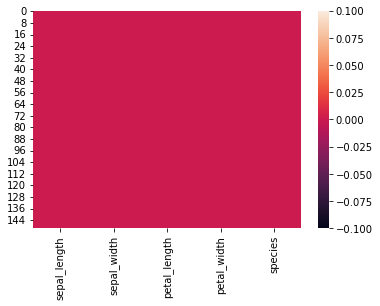

In [8]:
sns.heatmap(iris_data.isnull())

There are no null values

In [9]:
iris = iris_data.copy()

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### EDA

In [11]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

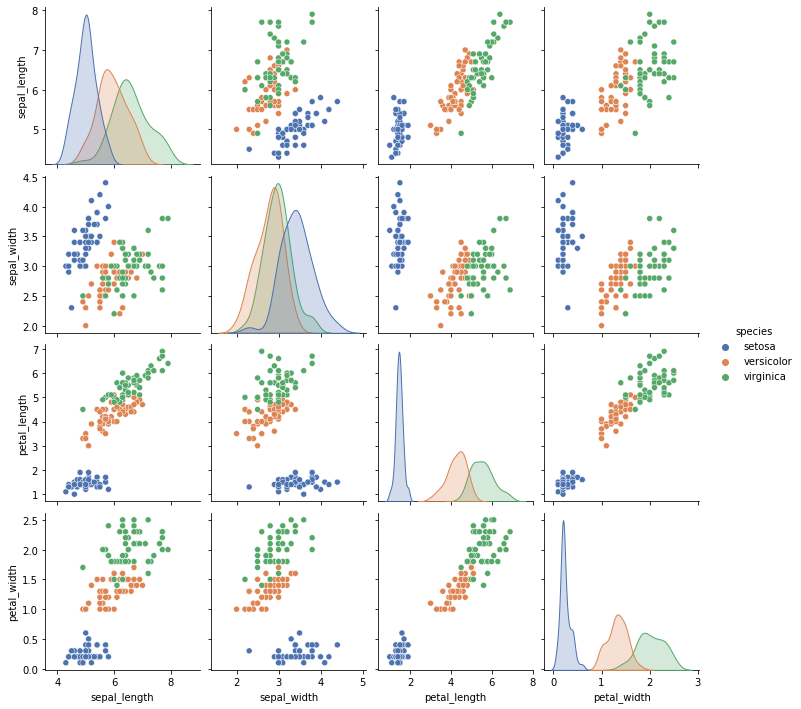

In [13]:
sns.pairplot(iris, hue = 'species', palette= 'deep')
plt.show()

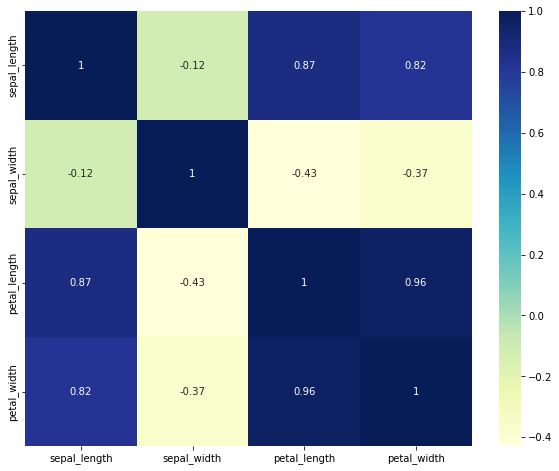

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(iris_data.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### Machine Learning

In [15]:
x = iris.drop(['species'], axis = 1)
y = iris['species']

In [16]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

**Logistic Regression**

As in Iris Dataset we have to classify the data points, we can consider Logistic Regression for solving this problem. 

In [18]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [20]:
sc

StandardScaler()

In [21]:
x_std = sc.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split

x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [23]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression(random_state=0, multi_class="ovr")

In [25]:
lr.fit(x_std, y)

LogisticRegression(multi_class='ovr', random_state=0)

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

In [27]:
y_pred = lr.predict(x_std)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.9466666666666667